In [10]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt


In [34]:
year = '2022'

In [35]:
# Loading the datasets

judgments = pd.read_csv(rf'D:\Proyectos\amag\classification\intermediate\judgements_case_file_{year}.csv')

In [36]:
def extract_last_n_words(text, n=300):
    # Verifica si el texto es una cadena
    if isinstance(text, str):
        # Divide el texto en palabras
        words = text.split()
        # Extrae las últimas n palabras
        last_n_words = words[-n:]
        # Une las palabras en un solo string
        return ' '.join(last_n_words)
    else:
        return ''  # Retorna una cadena vacía si el texto no es una cadena


# Aplicar la función a la columna del DataFrame
judgments['verdict_text'] = judgments['opinion_text'].apply(lambda x: extract_last_n_words(x, 300))

In [37]:
# Working with only first instance

judgments_1 = judgments[~judgments['resolution_type'].str.contains('vista', case=False, na=False)]

In [38]:
# Define regex patterns
infundada_pattern = re.compile(r'i\s*n\s*f\s*u\s*n\s*d\s*a\s*', re.IGNORECASE)
improcedente_pattern = re.compile(r'i\s*m\s*p\s*r\s*o\s*c\s*e\s*d\s*e\s*n\s*t\s*e\s*', re.IGNORECASE)
fundada_en_parte_pattern = re.compile(r'f\s*u\s*n\s*d\s*a\s*d\s*a\s*e\s*n\s*p\s*a\s*r\s*t\s*e\s*', re.IGNORECASE)
fundada_pattern = re.compile(r'f\s*u\s*n\s*d\s*a\s*d\s*a\s*', re.IGNORECASE)

# Function to classify text based on keywords
def classify_text(text):
    if not isinstance(text, str):
        text = str(text) if text is not None else ''
    
    if fundada_en_parte_pattern.search(text):
        return 'Partial'
    
    elif infundada_pattern.search(text) or improcedente_pattern.search(text):
        return 'Defendant'
    
    elif fundada_pattern.search(text):
        return 'Plaintiff'

    else:
        return 'Ambiguous'


In [39]:
judgments_1['outcome'] = (judgments_1['summary'].fillna('') + ' ' + judgments_1['resolution_type'].fillna('')+ ' ' + judgments_1['verdict_text'].fillna('')).apply(classify_text)

C:\Users\PC\AppData\Local\Temp\ipykernel_9524\3756496224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  judgments_1['outcome'] = (judgments_1['summary'].fillna('') + ' ' + judgments_1['resolution_type'].fillna('')+ ' ' + judgments_1['verdict_text'].fillna('')).apply(classify_text)


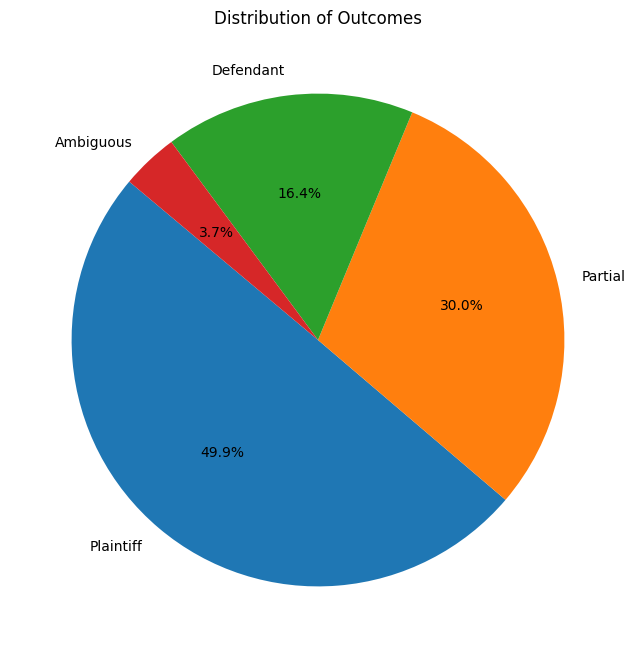

In [40]:
outcome_counts = judgments_1['outcome'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Outcomes')
plt.show()


In [41]:
judgments_1.to_csv(rf'D:\Proyectos\amag\classification\intermediate\judgmments_outcomes_{year}.csv')

In [1]:
import pandas as pd

df = pd.read_csv(r'D:\Proyectos\amag\classification\intermediate\judgmments_outcomes_2019.csv')
df

,Unnamed: 0,case_file,id,issued_date,resolution_number,resolution_type,notified_date,summary,court,judicial_district,...,procedure_type,law_field,sub_law_field,opinion_text,judge_from_opinion,second_instance,days_difference,score,verdict_text,outcome
0,0,00002-2019-0-0101-JP-CI-01,documentoD.html?nid=HhwCvGkigbsozkZYMfcx,2019-01-30,TRES,SENTENCIA,30/01/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSENTENCIA\n\...,1º JUZGADO DE PAZ LETRADO - Sede Central,AMAZONAS,...,NO CONTENCIOSO,CIVIL,RECTIFICACION DE PARTIDA,EXPEDIENTE \n\n: N° 0002-2019-0-0101-JP-CI-...,PATRICIA J. ALARCÓN FLORES,False,19,0.99958,"el contenido de las Partidas de Nacimiento, so...",Plaintiff
1,1,00002-2019-0-0107-JP-CI-01,documentoD.html?nid=gpPQwxBFhNzMwxieValZ,2019-03-12,DOCE,SENTENCIA,03/12/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tFALLA: \n\n1...,1° JUZGADO DE PAZ LETRADO - SEDE UTCUBAMBA,AMAZONAS,...,ABREVIADO,CIVIL,INDEMNIZACION POR DAÑOS Y PERJUICIOS,CORTE SUPERIOR DE JUSTICIA DE AMAZONAS\nCORTE ...,LABAN ZURITA LUISA,False,50,NaN,"Así mismo, respecto de la condena de costas y ...",Defendant
2,2,00003-2019-0-0102-JP-CI-01,documentoD.html?nid=XfVyEyniYOilKymkZS,2019-01-23,UNO,SENTENCIA,23/01/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tF A L L A: \...,JUZGADO DE PAZ LETRADO - MBJ de Bagua,AMAZONAS,...,NO CONTENCIOSO,CIVIL,RECTIFICACION DE PARTIDA,JUZGADO DE PAZ LETRADO - MBJ de Bagua \nEXPEDI...,CHARCAPE VIVES CARMEN JULIA,False,13,NaN,en los registros del Estado Civil de las Munic...,Ambiguous
3,3,00004-2019-0-0107-JP-CI-02,documentoD.html?nid=EHqUxgLMTxIPimkuNBhA,2019-05-15,TRES,SENTENCIA,15/05/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSE RESUELVE:...,2° JUZGADO DE PAZ LETRADO- SEDE UTCUBAMBA,AMAZONAS,...,UNICO DE EJECUCION,CIVIL,OBLIGACION DE DAR SUMA DE DINERO,2° JUZGADO DE PAZ LETRADO- SEDE UTCUBAMBA \nEX...,PILCO MASLUCAN MERCEDES,False,62,NaN,en el presente caso no se ha desvirtuado el mé...,Plaintiff
4,4,00006-2019-0-0102-JP-CI-01,documentoD.html?nid=vZgUizNvGVVxzULxrHDB,2020-01-31,OCHO,SENTENCIA,31/01/2020,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSENTENCIA: F...,JUZGADO DE PAZ LETRADO - MBJ de Bagua,AMAZONAS,...,ESPECIAL,CIVIL,DECLARACION JUDICIAL DE PATERNIDAD EXTRAMATRIM...,\n\n: 00006-2019-0-0102-JP-CI-01 \n: DECLARAC...,CHARCAPE VIVES CARMEN JULIA,False,381,NaN,que el mandato preventivo de filiación judicia...,Partial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33749,39829,00006-2019-0-3301-JR-LA-01,documentoD.html?nid=WqpBHNmJBFeNkNUIOEN,2019-07-26,CINCO,SENTENCIA,26/07/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tFUNDADA EN P...,JUZGADO DE TRABAJO,PUENTE PIEDRA - VENTANILLA,...,ORDINARIO,LABORAL,PAGO DE BENEFICIOS SOCIALES Y/O INDEMNIZACION ...,"\nEspecialista Legal : LA MADRID SANCHEZ, ...",POMA ALOSILLA NARDA KATHERINE,True,198,NaN,inscribir en las planillas a la demandante en ...,Partial
33750,39831,00007-2019-0-3301-JR-LA-01,documentoD.html?nid=yiJObBhXYgXpLZQN,2019-12-30,CINCO,SENTENCIA FUNDADA,30/12/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tFUNDADA\n\t\...,SALA LABORAL,PUENTE PIEDRA - VENTANILLA,...,ORDINARIO,LABORAL,PAGO DE BENEFICIOS SOCIALES Y/O INDEMNIZACION ...,\n\nCORTE SUPERIOR DE JUSTICIA DE VENTANILLA ...,(*)GARCIA MATALLANA ERWIN MAXIMILIANO. ZUÑIGA ...,True,355,NaN,"de contratos y otros; en consecuencia, se disp...",Plaintiff
33751,39833,00009-2019-0-3301-JR-LA-01,documentoD.html?nid=nrmjKFTOirUclgNDIah,2019-09-30,CINCO,SENTENCIA FUNDADA,30/09/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tFUNDADA\n\t\...,SALA LABORAL,PUENTE PIEDRA - VENTANILLA,...,ORDINARIO,LABORAL,PAGO DE BENEFICIOS SOCIALES Y/O INDEMNIZACION ...,\n\nCORTE SUPERIOR DE JUSTICIA DE VENTANILLA ...,(*)GARCIA MATALLANA ERWIN MAXIMILIANO. ZUÑIGA ...,True,263,NaN,por la Sétima Disposición Complementaria de la...,Plaintiff
33752,39835,00013-2019-0-3301-JR-LA-01,documentoD.html?nid=fYWWucjcdzNuYOog,2019-03-07,CUATRO,SENTENCIA,03/07/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tFUNDADA LA E...,JUZGADO DE TRABAJO,PUENTE PIEDRA - VENTANILLA,...,ORDINARIO,LABORAL,PAGO D

In [2]:
print(df.columns)


Index(['Unnamed: 0', 'case_file', 'id', 'issued_date', 'resolution_number',
       'resolution_type', 'notified_date', 'summary', 'court',
       'judicial_district', 'judge', 'start_date', 'procedure_type',
       'law_field', 'sub_law_field', 'opinion_text', 'judge_from_opinion',
       'second_instance', 'days_difference', 'score', 'verdict_text',
       'outcome'],
      dtype='object')


Getting outcomes from the orders

In [1]:
import pandas as pd
year = '2018'

In [32]:
orders = pd.read_csv(rf'D:\Proyectos\amag\classification\intermediate\orders_case_file_{year}.csv')

In [33]:
def extract_last_n_words(text, n=300):
    # Verifica si el texto es una cadena
    if isinstance(text, str):
        # Divide el texto en palabras
        words = text.split()
        # Extrae las últimas n palabras
        last_n_words = words[-n:]
        # Une las palabras en un solo string
        return ' '.join(last_n_words)
    else:
        return ''  # Retorna una cadena vacía si el texto no es una cadena


# Aplicar la función a la columna del DataFrame
orders['verdict_text'] = orders['opinion_text'].apply(lambda x: extract_last_n_words(x, 300))

In [34]:
orders_1 = orders[~orders['resolution_type'].str.contains('vista', case=False, na=False)]

In [95]:
import regex as re

# Define regex patterns

# Settlement patterns

conciliacion_pattern = re.compile(r'c\s*o\s*n\s*c\s*i\s*l\s*i\s*a\s*', re.IGNORECASE)
transaccion_pattern = re.compile(r't\s*r\s*a\s*n\s*s\s*a\s*c\s*c\s*i\s*o\s*n\s*', re.IGNORECASE)

# Dropped by plaintiff patterns

abandono_pattern = re.compile(r'a\s*b\s*a\s*n\s*d\s*o\s*n\s*o\s*', re.IGNORECASE)
desistimiento_pattern = re.compile(r'd\s*e\s*s\s*i\s*s\s*t\s*i\s*m\s*i\s*e\s*n\s*t\s*o\s*', re.IGNORECASE)
inasist_pattern = re.compile(r'i\s*n\s*a\s*s\s*i\s*s\s*t\s*', re.IGNORECASE)


# Negative patterns

infundada_pattern = re.compile(r'i\s*n\s*f\s*u\s*n\s*d\s*a\s*', re.IGNORECASE)
improcedente_pattern = re.compile(r'i\s*m\s*p\s*r\s*o\s*c\s*e\s*d\s*e\s*n\s*t\s*e\s*', re.IGNORECASE)
rechazar_pattern = re.compile(r'r\s*e\s*c\s*h\s*a\s*z\s*a\s*r\s*', re.IGNORECASE)
nulidad_pattern = re.compile(r'n\s*u\s*l\s*i\s*d\s*a\s*d\s*', re.IGNORECASE)    
incompentencia_pattern = re.compile(r'i\s*n\s*c\s*o\s*m\s*p\s*e\s*t\s*e\s*n\s*c\s*i\s*a\s*', re.IGNORECASE)
sin_declaración_pattern = re.compile(r's\s*i\s*n\s*d\s*e\s*c\s*l\s*a\s*r\s*a\s*c\s*i\s*ó\s*n\s*', re.IGNORECASE)

# Partial patterns

fundada_en_parte_pattern = re.compile(r'f\s*u\s*n\s*d\s*a\s*d\s*a\s*e\s*n\s*p\s*a\s*r\s*t\s*e\s*', re.IGNORECASE)

# Positive patterns

fundada_pattern = re.compile(r'f\s*u\s*n\s*d\s*a\s*d\s*a\s*', re.IGNORECASE)
llevar_adelante_pattern = re.compile(r'l\s*l\s*e\s*v\s*a\s*r\s*\s*a\s*d\s*e\s*l\s*a\s*n\s*t\s*e\s*', re.IGNORECASE)
allana_pattern = re.compile(r'a\s*l\s*l\s*a\s*n\s*a\s*', re.IGNORECASE)
adelante_pattern = re.compile(r'a\s*d\s*e\s*l\s*a\s*n\s*t\s*e\s*', re.IGNORECASE)

# Function to classify text based on keywords
def classify_text(text):
    if not isinstance(text, str):
        text = str(text) if text is not None else ''
    
    if conciliacion_pattern.search(text) or transaccion_pattern.search(text):
        return 'Settlement'
    
    elif abandono_pattern.search(text) or desistimiento_pattern.search(text) or inasist_pattern.search(text):
        return 'Dropped by Plaintiff'
    
    elif fundada_en_parte_pattern.search(text):
        return 'Partial'
    
    elif infundada_pattern.search(text) or improcedente_pattern.search(text) or rechazar_pattern.search(text) or nulidad_pattern.search(text) or incompentencia_pattern.search(text) or sin_declaración_pattern.search(text):
        return 'Defendant'
    
    elif fundada_pattern.search(text) or llevar_adelante_pattern.search(text) or allana_pattern.search(text) or adelante_pattern.search(text):
        return 'Plaintiff'

    else:
        return 'Ambiguous'

In [96]:
orders_1['outcome'] = (orders_1['summary'].fillna('') + ' ' + orders_1['resolution_type'].fillna('')+ ' ' + orders_1['verdict_text'].fillna('')).apply(classify_text)

C:\Users\PC\AppData\Local\Temp\ipykernel_2716\1151336191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_1['outcome'] = (orders_1['summary'].fillna('') + ' ' + orders_1['resolution_type'].fillna('')+ ' ' + orders_1['verdict_text'].fillna('')).apply(classify_text)


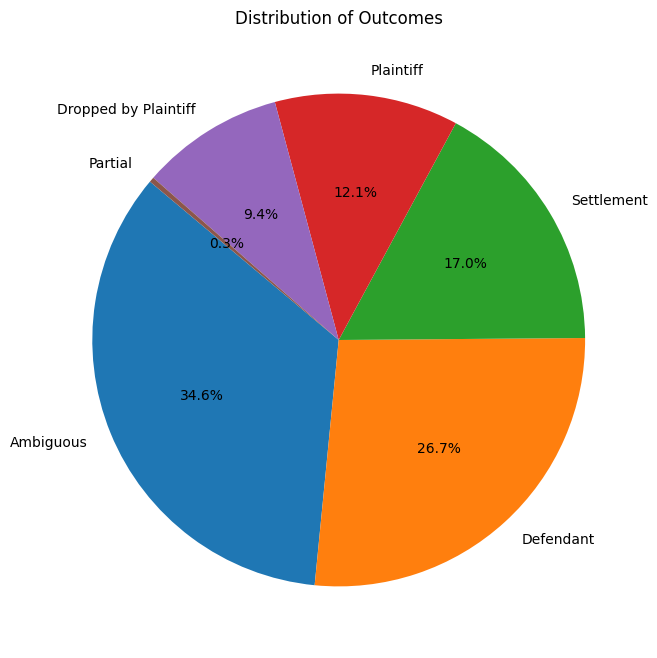

In [97]:
outcome_counts = orders_1['outcome'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Outcomes')
plt.show()


In [99]:
orders_a = orders_1[orders_1['outcome'].str.contains('Ambiguous', case=False, na=False)]
orders_a

,case_file,id,issued_date,resolution_number,resolution_type,notified_date,summary,court,judicial_district,judge,...,procedure_type,law_field,sub_law_field,opinion_text,judge_from_opinion,days_difference,second_instance,score,verdict_text,outcome
22,00006-2018-0-0201-JP-FC-01,documentoD.html?nid=TSZgNzieKzbRTYMp,2021-01-29,DIECISIETE,AUTO FINAL,29/01/2021,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tAUTO FINAL\n...,3°JUZGADO DE PAZ LETRADO - Sede Central,ANCASH,"HUERTA BOJORQUEZ, CARMEN EUGENIA",...,UNICO,FAMILIA CIVIL,PRORRATEO DE ALIMENTOS,\n\n3° JUZGADO DE PAZ LETRADO - Sede Central ...,"HUERTA BOJORQUEZ, CARMEN EUGENIA",1121.0,False,NaN,por Cristian Espinoza Damián contra Amabelia J...,Ambiguous
34,00041-2018-0-0201-JP-FC-02,documentoD.html?nid=JjpykikLtvZJxNj,2019-07-24,CINCO,AUTO FINAL,24/07/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tAUTO FINAL\n...,3°JUZGADO DE PAZ LETRADO - Sede Central,ANCASH,"HUERTA BOJORQUEZ, CARMEN EUGENIA",...,UNICO,FAMILIA CIVIL,FILIACION,3°JUZGADO DE PAZ LETRADO - Sede Central \nEXPE...,"HUERTA BOJORQUEZ, CARMEN EUGENIA",554.0,False,NaN,ciudadanía; sin embargo esta debe hacerse con ...,Ambiguous
35,00042-2018-0-0204-JP-FC-01,documentoD.html?nid=BDvDduLDpfeWfvYk,2020-12-16,NUEVE,AUTO DE ARCHIVO DEFINITIVO,16/12/2020,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tRESUELVE: DE...,JUZGADO DE PAZ LETRADO - Sede Chiquian,ANCASH,TOLENTINO JACOME ROSSANA,...,UNICO,FAMILIA CIVIL,ALIMENTOS,\n \n\n: 00042-2018-0-0204-JP-FC-01 \n: ALIME...,TOLENTINO JACOME ROSSANA,973.0,False,NaN,: 00042-2018-0-0204-JP-FC-01 : ALIMENTOS : CAL...,Ambiguous
36,00046-2018-0-0201-JP-FC-01,documentoD.html?nid=ZizPSmoxVfZOiSnAnW,2019-10-24,CINCO,AUTO FINAL,24/10/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tPOR ESTAS CO...,3°JUZGADO DE PAZ LETRADO - Sede Central,ANCASH,"HUERTA BOJORQUEZ, CARMEN EUGENIA",...,UNICO,FAMILIA CIVIL,EJECUCION DE ACTA DE CONCILIACION,3°JUZGADO DE PAZ LETRADO - Sede Central \nEXPE...,"HUERTA BOJORQUEZ, CARMEN EUGENIA",645.0,False,NaN,en concreto a través de la resolución número u...,Ambiguous
40,00057-2018-0-0201-JP-FC-02,documentoD.html?nid=kjEGnVDTAnrypPrYqr,2019-09-16,OCHO,AUTO FINAL,16/09/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tPOR ESTAS CO...,3°JUZGADO DE PAZ LETRADO - Sede Central,ANCASH,"HUERTA BOJORQUEZ, CARMEN EUGENIA",...,UNICO,FAMILIA CIVIL,ALIMENTOS,3°JUZGADO DE PAZ LETRADO - Sede Central \nEXPE...,"HUERTA BOJORQUEZ, CARMEN EUGENIA",605.0,False,NaN,en el presente caso en concreto a través de la...,Ambiguous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64707,00171-2018-0-3301-JR-CI-02,documentoD.html?nid=TGLFsuXPMiMsCiFW,2018-03-08,CUATRO,AUTO,03/08/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tCONCÉDASE AP...,SALA CIVIL,PUENTE PIEDRA - VENTANILLA,NaN,...,CONOCIMIENTO,CIVIL,NULIDAD DE ACTO JURIDICO,\n \n\n: 00171-2018-0-3301-JR-CI-02 \n: NULID...,NaN,-109.0,True,NaN,el artículo 358° del mismo cuerpo normativo qu...,Ambiguous
64708,00171-2018-0-3301-JR-CI-02,documentoD.html?nid=UxvmigfdPtAMeFPZzi,2018-07-25,TRES,AUTO,25/07/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDECLARAR INA...,SALA CIVIL,PUENTE PIEDRA - VENTANILLA,NaN,...,CONOCIMIENTO,CIVIL,NULIDAD DE ACTO JURIDICO,\n \n\n: 00171-2018-0-3301-JR-CI-02 \n: NULID...,NaN,30.0,True,NaN,la idea del perjuicio ha de entenderse como ba...,Ambiguous
64716,00173-2018-1-3301-JR-CI-03,documentoD.html?nid=onVWPhnhGRKBOwbt,2018-07-24,TRES,CONCESORIO APELACION DE AUTO CON EFECTO SUSPEN...,24/07/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t1.- CONCEDER...,3° JUZGADO CIVIL - SEDE ANEXO 2,PUENTE PIEDRA - VENTANILLA,ESTELA SOLANO ALEJOS,...,CONSTITUCIONAL,CIVIL,ACCION DE AMPARO,CORTE SUPERIOR DE JUSTICIA DE VENTANILLA \n\n...,ESTELA SOLANO ALEJOS,29.0,True,NaN,subsanar su recurso indicando la naturaleza de...,Ambiguous
64732,00381-2018-2-3301-JR-FT-01,documentoD.html?nid=jRSdAPNpaFLAppMX,2018-11-30,CINCO,AUTO,27/12/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDÉJESE SIN E...,JUZGADO CIVIL - SEDE ANCON,PUENTE PIEDRA - VENTANILLA,<NO DEFINIDO>,...,UNICO,FAMILIA TUTELAR,VIOLENCIA

In [100]:
unique_labels_count = orders_a['resolution_type'].unique()
unique_labels_count

array(['AUTO FINAL', 'AUTO DE ARCHIVO DEFINITIVO', 'AUTO DE CONCLUSION',
       'AUTO FINAL CONCL. DEL PROC.SIN DECLARACION SOBRE EL FONDO',
       'AUTO QUE DECLARA CONSENTIDO EL AUTO FINAL',
       'AUTO QUE DISPONE ARCHIVO DEFINITIVO',
       'AUTO CONCLUYE EJECUCION Y DISPONE ARCHIVO DEFINITIVO',
       'AUTO DE CONCLUSION Y ARCHIVAMIENTO',
       'AUTO FINAL DE SUSTRACCION DE LA MATERIA',
       'AUTO FINAL CONCL. DEL PROC. SIN DECLARACION SOBRE EL FONDO',
       'AUTO FINAL SUSTRACCION DE LA MATERIA', 'AUTO',
       'AUTO CONCESORIO DE APELACION', 'AUTO INADMISIBLE',
       'AUTO ADMISORIO', 'AUTO DE DECLARACION DE REBELDIA',
       'AUTO DE ABSTENCION', 'AUTO QUE RECHAZA LA DEMANDA',
       'CONCESORIO APELACION DE AUTO CON EFECTO SUSPENSIVO',
       'AUTO DE CONCESORIO DE CASACION',
       'CONCESORIO APELACION DE AUTO SIN EFECTO SUSPENSIVO',
       'AUTO DE INHIBICION', 'AUTO DE ARCHIVO PROVISIONAL',
       'AUTO DE SANEAMIENTO',
       'AUTO CON CONCESORIO DE APELACION SIN EF

In [109]:
orders_2 = orders_a[orders_a['resolution_type'].str.contains('AUTO FINAL', case=False, na=False)]
orders_2.tail(20)

,case_file,id,issued_date,resolution_number,resolution_type,notified_date,summary,court,judicial_district,judge,...,procedure_type,law_field,sub_law_field,opinion_text,judge_from_opinion,days_difference,second_instance,score,verdict_text,outcome
58418,00159-2018-0-1410-JM-FC-01,documentoD.html?nid=uBvzaZrtRyfTqMFZ,2018-10-31,DOS,AUTO FINAL,31/10/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDICTA MEDIDA...,JUZGADO MIXTO - Sede Palpa,ICA,BONILLA FRIAS JOSE MOISES,...,UNICO,FAMILIA CIVIL,VIOLENCIA FAMILIAR,\n\nCORTE SUPERIOR DE JUSTICIA DE ICA \n\nJuz...,BONILLA FRIAS JOSE MOISES,6.0,True,NaN,Yarassi Mendoza. b) El cese de la violencia po...,Ambiguous
58424,00192-2018-0-1412-JM-FC-02,documentoD.html?nid=QyyTbxPMEfNAuBZnSTyv,2018-03-13,ACTA DE AUTO FINAL,AUTO FINAL,13/03/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSE RESUELVE:...,JUZGADO CIVIL - SEDE MBJ PARCONA,ICA,JUDITH ASTOHUAMAN URIBE,...,UNICO,FAMILIA CIVIL,VIOLENCIA FAMILIAR,\nJuzgado Mixto - Sede MBJ Parcona\nEXPEDIENTE...,JUDITH ASTOHUAMAN URIBE,20.0,True,0.999582,"del menor JHOSUE YAHIR DE LA CRUZ GUEVARA, has...",Ambiguous
58621,00068-2018-0-1507-JP-FC-04,documentoD.html?nid=qIddHchpSZwWYWSk,2019-09-17,NUEVE,AUTO FINAL,17/09/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tARCHIVO DEFI...,3° JUZG. PAZ LETRADO - SEDE HUANCAYO (EX 4° JPL),JUNIN,KATHYA CORINA JORGE RAMIREZ,...,UNICO,FAMILIA CIVIL,ALIMENTOS,\n\nCorte Superior de Justicia de Junín \n\nT...,KATHYA CORINA JORGE RAMIREZ,616.0,True,NaN,"con la constancia que antecede; y, CONSIDERAND...",Ambiguous
58820,00553-2018-0-1501-JR-FC-01,documentoD.html?nid=uXLNfoomDBAGbEpPy,2018-09-02,DOS,AUTO FINAL,09/02/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tAUTO FINAL\n...,1° JUZGADO FAMILIA - SEDE CENTRAL,JUNIN,CARDENAS PUENTE TERESA,...,UNICO,FAMILIA CIVIL,VIOLENCIA FAMILIAR,\n CORTE SUPERIOR DE JUSTI...,CARDENAS PUENTE TERESA,222.0,True,0.999532,la mano otra denuncia en el Expediente N°553-2...,Ambiguous
58831,00695-2018-0-1501-JR-FC-02,documentoD.html?nid=OHqkvNUzezvWMsbl,2021-11-05,AUTO FINAL,AUTO FINAL,11/05/2021,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tAUTO FINAL S...,2° JUZGADO FAMILIA - SEDE CENTRAL,JUNIN,CARDENAS VILLEGAS MIRIAM LUZ,...,NO CONTENCIOSO,FAMILIA CIVIL,PRUEBA ANTICIPADA,\n\n2° JUZGADO FAMILIA - MODULO FAMILIA DE HU...,CARDENAS VILLEGAS MIRIAM LUZ,1375.0,True,NaN,la voluntad de las partes no pudiendo el tribu...,Ambiguous
59427,00075-2018-0-1601-JP-CI-05,documentoD.html?nid=JEEdFfrOpJossiXZe,2018-11-05,RESOLUCION NUMERO UNO,AUTO FINAL,11/05/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tAUTO FINAL (...,5to JUZGADO PAZ LETRADO,LA LIBERTAD,RAFAEL EDUARDO RODRIGUEZ BAQUEDANO,...,EJECUTIVO,CIVIL,OBLIGACION DE DAR SUMA DE DINERO,CORTE SUPERIOR DE LA \nLIBERTAD \nSecretario: ...,MARIELA MORENO VEGA,299.0,True,0.999575,"Ley Orgánica del Poder Judicial, prescribe sob...",Ambiguous
59895,00051-2018-0-1713-JP-CI-01,documentoD.html?nid=dGlIdZJXHkUlyfvlX,2018-09-28,TRES,AUTO FINAL,28/09/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t[1] DECLARAR...,JUZGADO DE PAZ LETRADO MONSEFU,LAMBAYEQUE,CARLA YOLANDA PAREDES CICCIA,...,EJECUTIVO,CIVIL,OBLIGACION DE DAR SUMA DE DINERO,\n\n \n\nCorte Superior de Justicia de Lambay...,Ana Sofía Pérez Santa Cruz,121.0,True,0.999570,la persona a la orden de quien deba hacerse el...,Ambiguous
60202,00005-2018-0-1706-JR-CO-08,documentoD.html?nid=jlVzpYGboIxktOGRlKEh,2019-11-18,CATORCE,AUTO FINAL DE SUSTRACCION DE LA MATERIA,18/11/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSE RESUELVE:...,8° JUZGADO CIVIL - COMERCIAL,LAMBAYEQUE,SANDRO OMAR AGUILAR GAITAN,...,UNICO DE EJECUCION,COMERCIAL,EJECUCION DE GARANTIAS,\n\n \n\n \n\n \n \n \n\n \n \n \n\n: 00005-2...,SANDRO OMAR AGUILAR GAITAN,682.0,True,NaN,"obligación que ésta contiene, novarla, prorrog...",Ambiguous
60484,00102-2018-0-1708-JM-CI-01,documentoD.html?nid=bDqGORTTQaAiwIU,2021-05-31,OCHO,AUTO FINAL,31/05/2021,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSE RESUELVE ...,JUZGADO CIVIL - LAMBAYEQUE,LAMBAYEQUE,SAAVEDRA GUZMAN RONAL ORLANDO,...,CONSTITUCIONAL,CIVIL,ACCION DE CUMPLIMIENTO,"\n\n \n\nAUTOS

In [116]:
cell_value = orders_a.at[63444, 'summary']  # Accesses the first row, 'outcome' column
cell_value

'\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDECLARAR CONCLUIDO EL PRESENTE PROCESO\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t'

In [ ]:
orders_1.to_csv(rf'D:\Proyectos\amag\classification\intermediate\orders_outcomes_{year}.csv')